# California Fire Visualization

Adapted from an assignment submitted for course, "Applied Plotting, Charting, and Data Representation in Python".
<br/>By: Kathleen Kennedy
<br/>9/14/2020


## Data Sources
Fire data through 2019: https://www.nifc.gov/fireInfo/fireInfo_stats_lightng-human.html <br/>
Fire data for 2020: https://www.fire.ca.gov/stats-events/ (only data through Aug 30th was available)


In [5]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Data from National Interagency Fire Center 
cols = ["Year","Southern California","Northern California"]
light_num = pd.read_csv('Lightning_caused_fires.txt', sep='\t',skiprows=2,usecols = cols,index_col = 0,dtype=str) 
light_acre = pd.read_csv('Lightning_caused_acres.txt', sep='\t',skiprows=1, usecols = cols,index_col = 0,dtype=str) 
human_num = pd.read_csv('Human_caused_fires.txt', sep='\t',skiprows=1, usecols = cols,index_col = 0,dtype=str)
human_acre = pd.read_csv('Human_caused_acres.txt', sep='\t',skiprows=1, usecols = cols,index_col = 0,dtype=str) 

# Remove comma separators, convert from string to float, sum SoCal and NorCal data
def clean_up(x): return x.replace(',','')
light_num = light_num.apply(np.vectorize(clean_up)).astype(float).sum(axis=1).rename('Light_Num')
light_acre = light_acre.apply(np.vectorize(clean_up)).astype(float).sum(axis=1).rename('Light_Acre')
human_num = human_num.apply(np.vectorize(clean_up)).astype(float).sum(axis=1).rename('Human_Num')
human_acre = human_acre.apply(np.vectorize(clean_up)).astype(float).sum(axis=1).rename('Human_Acre')

# Merge the datasets to have combined lightning and human-caused together
fire_numbers = pd.concat([light_num,human_num],axis=1)
fire_numbers['Total_Num'] = fire_numbers.sum(axis=1)
fire_acres = pd.concat([light_acre,human_acre],axis=1)
fire_acres['Total_Acres'] = fire_acres.sum(axis=1)

# Merge into a single dataset for plotting
df = fire_numbers.merge(fire_acres,left_index=True,right_index=True)
df['Percent_Human_Num'] = df.Human_Num/df.Total_Num
df['Percent_Human_Acre'] = df.Human_Acre/df.Total_Acres
df['Avg_Size'] = df.Total_Acres/df.Total_Num
data_2020 = [7335,1666286,227] # Data through Aug 30, 2020

<IPython.core.display.Javascript object>


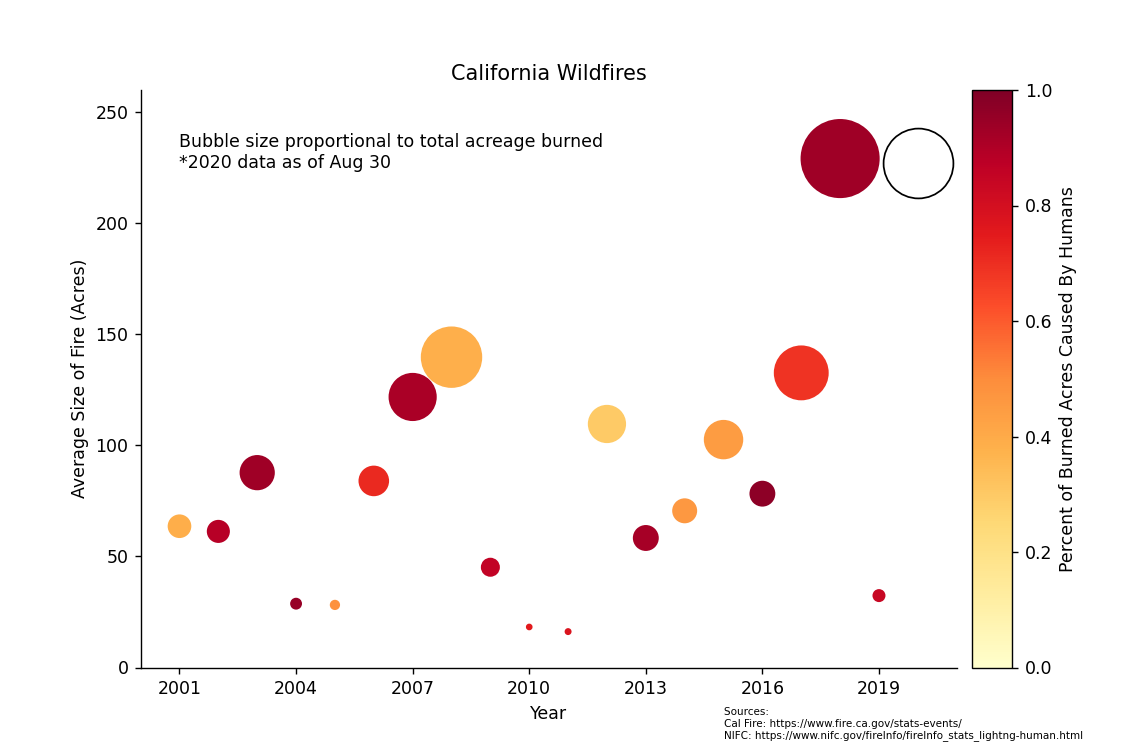

In [11]:
# Set figure size and set up plot axes and colorbar axes
fig, ax = plt.subplots(figsize=(9,6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.12)

# Set colors for datapoints and size of datapoints, plot in scatter plot
size = (((4/np.pi)*(df.Total_Acres/df.Total_Acres.max())*35)**2).astype(np.int64).tolist()
sz_2020 = np.int64((((4/np.pi)*(data_2020[1]/df.Total_Acres.max())*35)**2))
cmap = plt.get_cmap('YlOrRd')
colors = cmap(df.Percent_Human_Acre)
ax.scatter(df.index.values.tolist(),df.Avg_Size.tolist(),s=size,c=colors)
ax.scatter(2020,data_2020[2], s=sz_2020 , c='w', edgecolors = 'k')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Colorbar
sm = ScalarMappable(cmap=cmap)
sm.set_array([0,.2,.4,.6,.8,1.0])
cb = plt.colorbar(sm,cax=cax, label='Percent of Burned Acres Caused By Humans')
cb.ax.yaxis.set_ticks_position('right')

# Add text to plot
text = 'Bubble size proportional to total acreage burned \n*2020 data as of Aug 30'
text_2 = ('Sources: \nCal Fire: https://www.fire.ca.gov/stats-events/' +
          '\nNIFC: https://www.nifc.gov/fireInfo/fireInfo_stats_lightng-human.html')
ax.text(2001,225,text)
ax.text(2015,-32,text_2, fontsize = 6)

# Set axis limits and titles, show plot
ax.set_xlim(2000,2021)
ax.set_ylim(0,260)
ax.set_xlabel('Year')
ax.set_ylabel('Average Size of Fire (Acres)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('California Wildfires')
plt.show()